# 1. 简单线性回归的python实现

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['simhei']

In [2]:
ex0 = pd.read_table('ex0.txt',header = None)
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [3]:
ex0.shape

(200, 3)

In [4]:
ex0.describe()

,0,1,2
count,200.0,200.000000,200.000000
mean,1.0,0.488319,3.835601
std,0.0,0.292943,0.503443
min,1.0,0.014855,3.078132
25%,1.0,0.234368,3.452775
50%,1.0,0.466573,3.839350
75%,1.0,0.730712,4.247613
max,1.0,0.995731,4.692514


In [5]:
"""
函数功能：
        输入DF数据集（最后一列为标签），返回特征矩阵和标签矩阵
"""
def get_Mat(dataSet):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat, yMat

In [6]:
xMat,yMat = get_Mat(ex0)

In [7]:
"""
函数功能：数据可视化
"""
def plotshow(dataSet):
    xMat,yMat = get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c = 'b',s =5)
    plt.show()

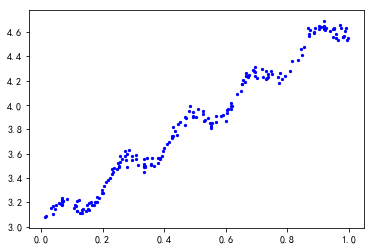

In [8]:
plotshow(ex0)

In [9]:
"""
函数功能：计算回归系数
参数说明：
        dataSet:原始数据集
返回：
    ws：回归系数
"""
def standRegres(dataSet):
    xMat, yMat = get_Mat(dataSet)
    XTX = xMat.T * xMat
    if np.linalg.det(XTX) == 0:
        print('矩阵为奇异矩阵，无法求逆')
        return 
    ws = XTX.I * (xMat.T * yMat)
    return ws

In [10]:
ws = standRegres(ex0)
ws

matrix([[3.00774324],
        [1.69532264]])

In [11]:
"""
函数功能：绘制散点图和最佳拟合直线
"""
def plotReg(dataSet):
    xMat , yMat = get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    ws = standRegres(dataSet)
    yHat = xMat * ws
    plt.plot(xMat[:,1],yHat, c='r')
    plt.show()

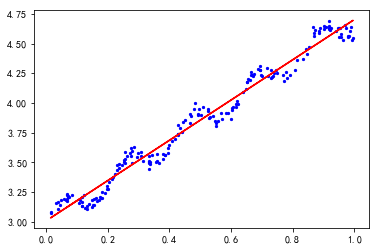

In [12]:
plotReg(ex0)

In [13]:
xMat,yMat = get_Mat(ex0)
ws = standRegres(ex0)
yHat = xMat * ws
np.corrcoef(yHat.T,yMat.T)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

# 2.构建LWLR函数

In [14]:
"""
函数功能：计算局部加权线性回归的预测值
参数说明：
        testMat:测试集
        xMat:训练集的特征矩阵
        yMat：训练集的标签矩阵
返回：
        yHat: 函数预测值
"""
def LWLR(testMat,xMat,yMat,k =1.0):
    n = testMat.shape[0]
    m = xMat.shape[0]
    weights = np.mat(np.eye(m))    #创建对角单位矩阵
    yHat = np.zeros(n)
    for i in range(n):
        for j in range(m):
            diffMat = testMat[i] - xMat[j]
            weights[j,j] = np.exp(diffMat * diffMat.T/(-2*k**2))
        XTX = xMat.T*(weights * xMat)
        if np.linalg.det(XTX) == 0:
            print('矩阵为奇异矩阵，不能求逆')
            return
        ws = XTX.I*(xMat.T*(weights * yMat))
        yHat[i] = testMat[i] * ws
    return ws, yHat


In [15]:
xMat,yMat = get_Mat(ex0)
#将数据点排列（argsort（）默认升序排序，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0]

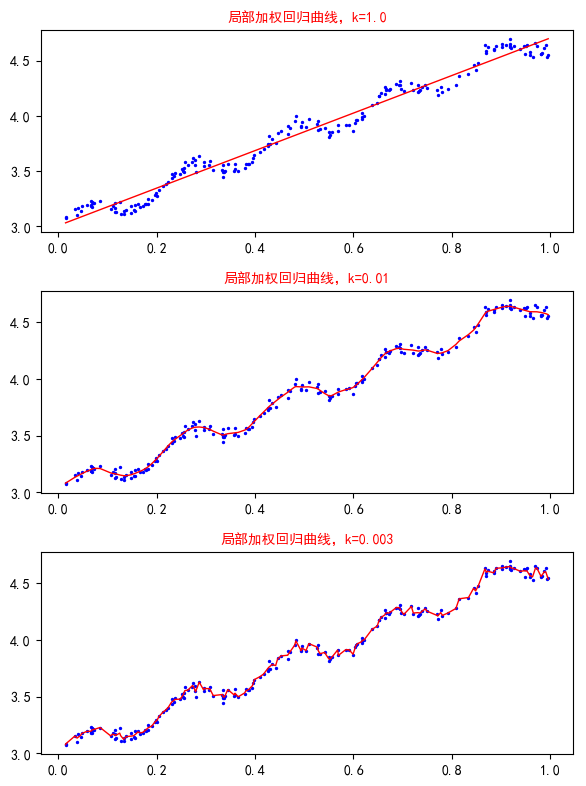

In [16]:
#计算不同k值下的y估计值yHat
ws1 ,yHat1 = LWLR(xMat,xMat,yMat,k =1.0)
ws2 ,yHat2 = LWLR(xMat,xMat,yMat,k =0.01)
ws3 ,yHat3 = LWLR(xMat,xMat,yMat,k =0.003)

#创建画布
fig = plt.figure(figsize = (6,8),dpi =100)

#子图1绘制k=1.0的曲线
fig1 = fig.add_subplot(311)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat1[srtInd],linewidth = 1,color = 'r')
plt.title('局部加权回归曲线，k=1.0',size = 10,color = 'r')
#子图2绘制k=0.01的曲线
fig2 = fig.add_subplot(312)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat2[srtInd],linewidth = 1,color = 'r')
plt.title('局部加权回归曲线，k=0.01',size = 10,color = 'r')
#子图1绘制k=0.003的曲线
fig3 = fig.add_subplot(313)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat3[srtInd],linewidth = 1,color = 'r')
plt.title('局部加权回归曲线，k=0.003',size = 10,color = 'r')

#调整子图的间距
plt.tight_layout(pad =1.2)
plt.show()

In [20]:
"""
函数功能：计算回归系数
参数说明：
        dataSet:原始数据集
        lam:人为设定的惩罚系数（默认为0.2）
返回：
    ws：回归系数
"""
def ridgeRegres(dataSet,lam =0.2):
    xMat, yMat = get_Mat(dataSet)
    XTX = xMat.T * xMat
    denom = XTX + np.eye(xMat.shape[1]) * lam
    ws = denom.I * (xMat.T * yMat)
    return ws

In [22]:
ridgeRegres((ex0),lam =0.2)

matrix([[3.00602279],
        [1.69269   ]])